In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVR

In [3]:
#Reading the data
df =pd.read_csv('Turbine_Data.csv')

In [ ]:
#Getting information about the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

# DATA EXPLORATION

In [4]:
#There are 5 variables, the goal is to try to predict wind power using wind speed and wind direction. data is from the first of january to the 31st of december 2018.
df.head(5)

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [5]:
#Dealing with a lot of missing data.
df.isna().sum()

,0
Unnamed: 0,0
ActivePower,23474
AmbientTemperatue,24407
BearingShaftTemperature,55706
Blade1PitchAngle,76228
Blade2PitchAngle,76333
Blade3PitchAngle,76333
ControlBoxTemperature,56064
GearboxBearingTemperature,55684
GearboxOilTemperature,55786


In [6]:
#checking data types
df.dtypes

,0
Unnamed: 0,object
ActivePower,float64
AmbientTemperatue,float64
BearingShaftTemperature,float64
Blade1PitchAngle,float64
Blade2PitchAngle,float64
Blade3PitchAngle,float64
ControlBoxTemperature,float64
GearboxBearingTemperature,float64
GearboxOilTemperature,float64


In [7]:
#Getting numerical information about the data
df.describe(include = 'all')

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
count,118224,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,...,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,118224,72278.000000,94595.000000
unique,118224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118224,NaN,NaN
mean,NaN,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,...,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,NaN,196.290539,5.878960
std,NaN,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,...,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,NaN,88.296554,2.619084
min,NaN,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,NaN,0.000000,0.000000
25%,NaN,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,...,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,NaN,145.000000,3.823330
50%,NaN,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,...,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,NaN,182.000000,5.557765
75%,NaN,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,...,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,NaN,271.000000,7.506710


In [8]:
#Renaming the date column
df = df.rename({'Unnamed: 0':'Datetime'}, axis = 1)
df['Datetime'] = pd.to_datetime(df['Datetime'],dayfirst = True)

<ipython-input-8-7ff43a0af79a>:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S%z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'],dayfirst = True)


In [13]:
#filling missing data with the median
# df.fillna(df.median(),inplace = True)
df.fillna(df.select_dtypes(include=[np.number]).apply(np.median), inplace=True)


In [10]:
#Numerical Information after filling with median values
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


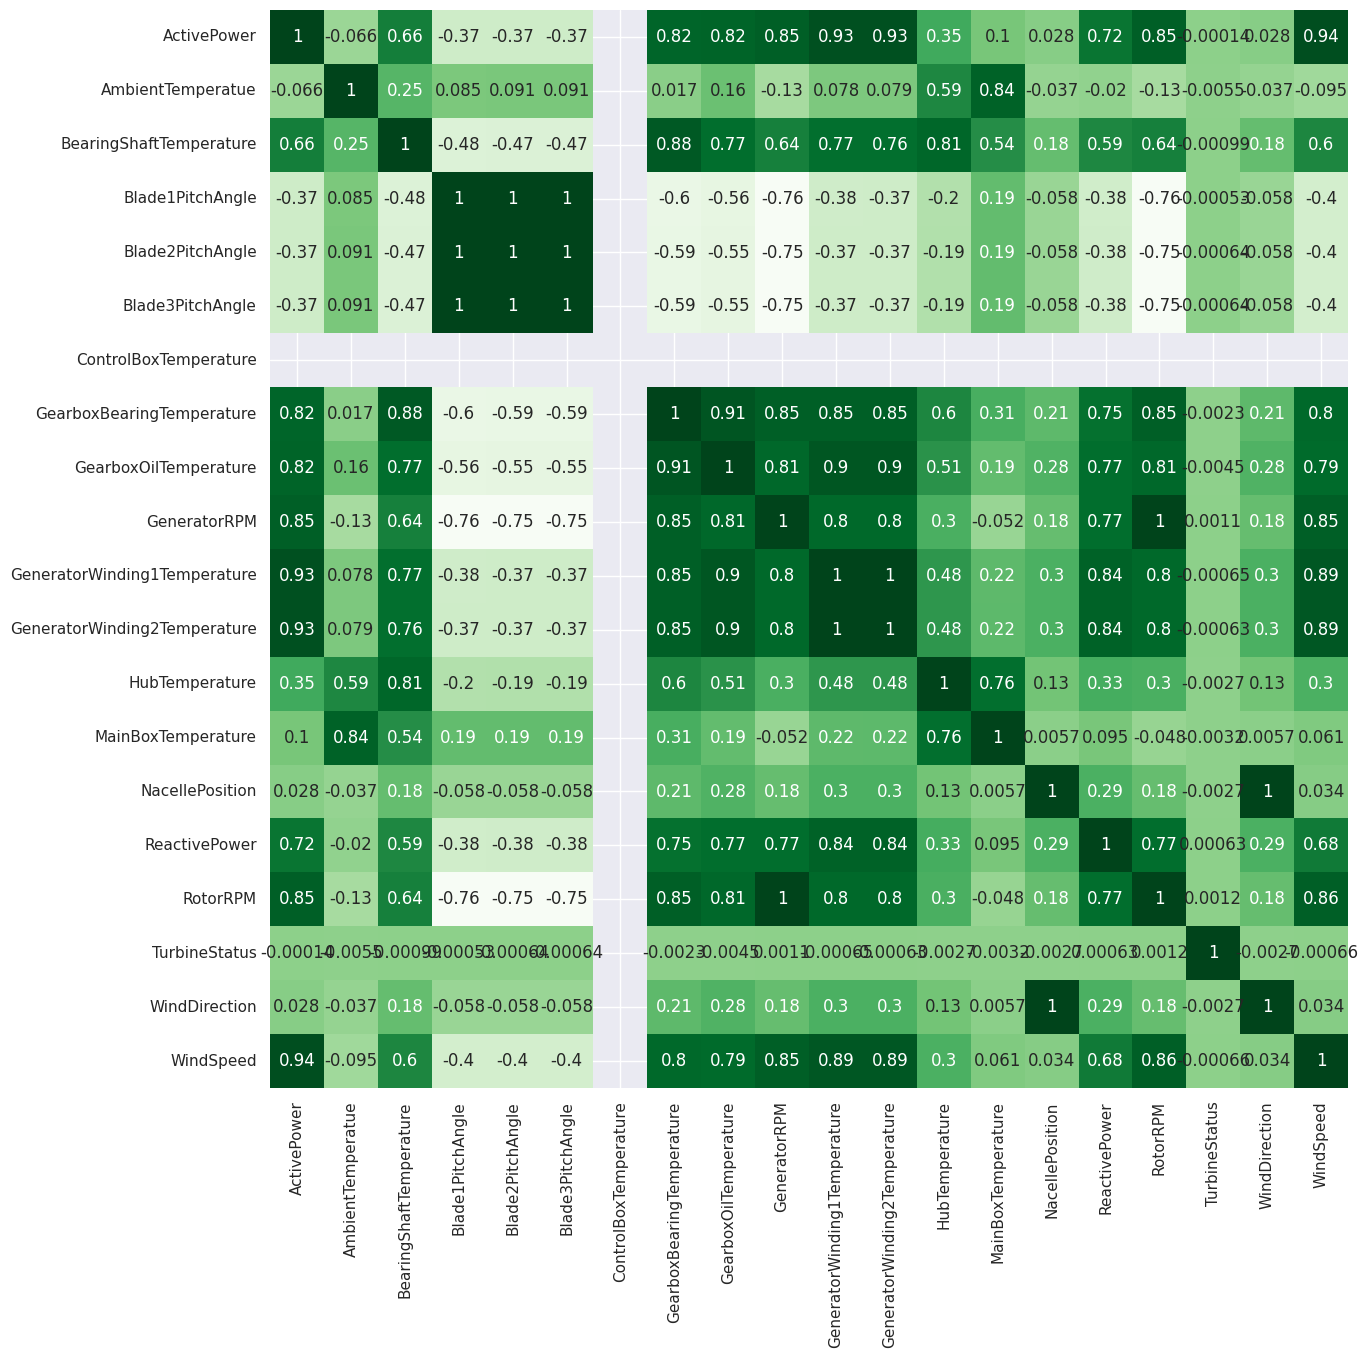

In [15]:
#Correlation matrix between target and features.
plt.figure(figsize=(14,14))
# sns.heatmap(df.corr(), cbar=False, square= True, annot=True, cmap='Greens')
sns.heatmap(df.select_dtypes(include=['number']).corr(), cbar=False, square= True, annot=True, cmap='Greens')

plt.savefig('correlation matrix1',dpi=300)

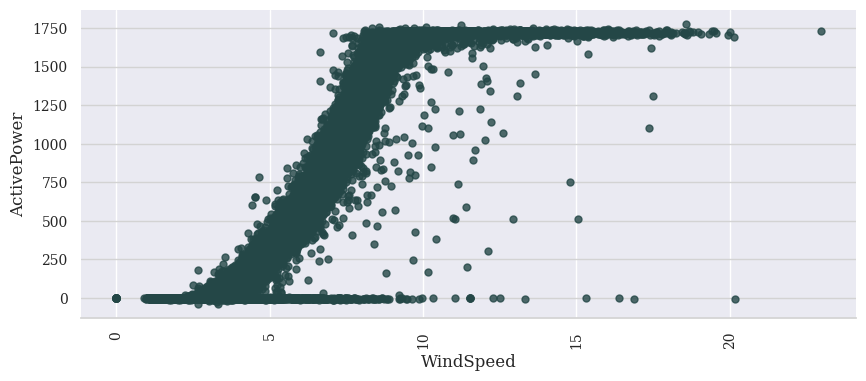

In [16]:
#plot windspeed and Active power
fig, ax = plt.subplots(figsize=(10,4))



# Ax spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.spines['bottom'].set_color('lightgray')

# Grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgray', linestyle='-')

# Plot

plt.scatter(x =df['WindSpeed'] , y = df['ActivePower'] ,color='#244747',s = 25 , alpha = 0.8 )


# Tick control
plt.yticks(fontsize=10, fontfamily='serif',fontweight='light')
#ax.yaxis.set_ticks(np.arange(0,140,10))

plt.xticks(fontsize=10, fontfamily='serif',fontweight='light',rotation=90)


# Label control
ax.set_ylabel('ActivePower',fontfamily='serif',fontsize=12)
ax.set_xlabel('WindSpeed',fontfamily='serif',fontsize=12)


plt.show()

#### The exponential increase is logical as the power gotten from the wind is the cube of the windspeed and power is 0 sometimes assuming the turbine is shut down.

(array([4.1550e+03, 2.9563e+04, 3.0897e+04, 1.9688e+04, 7.3110e+03,
        2.2820e+03, 5.6300e+02, 1.1000e+02, 2.2000e+01, 4.0000e+00]),
 array([ 0.        ,  2.29708931,  4.59417862,  6.89126793,  9.18835724,
        11.48544656, 13.78253587, 16.07962518, 18.37671449, 20.6738038 ,
        22.97089311]),
 <BarContainer object of 10 artists>)

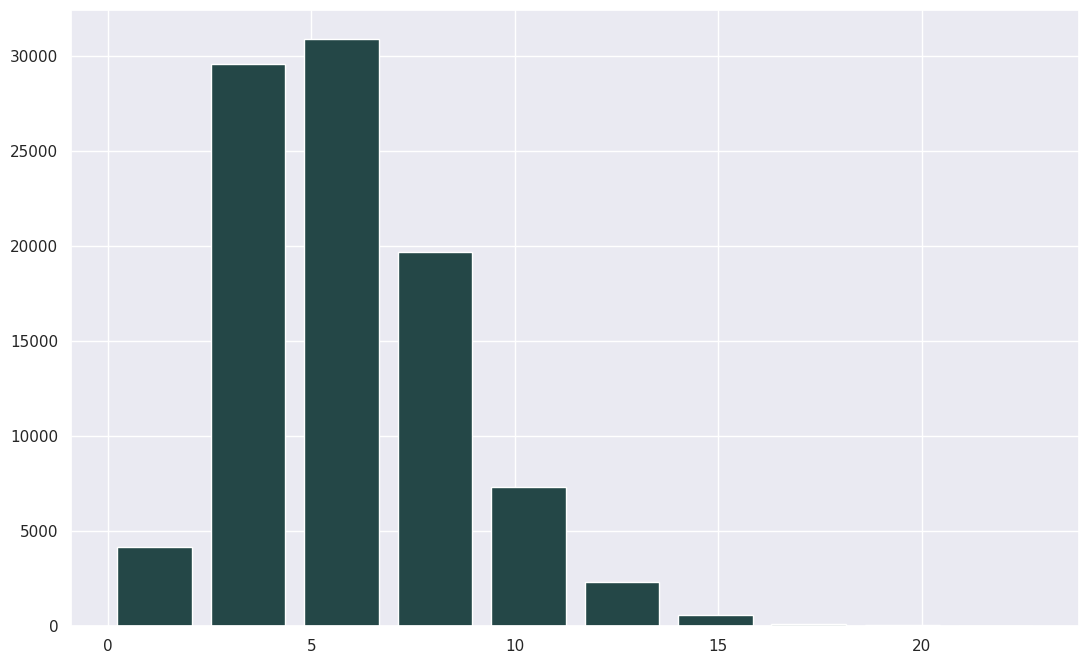

In [17]:
#Distribution of windspeed
plt.rcParams['figure.figsize'] = (13,8)
plt.hist(df.WindSpeed, rwidth = 0.8,color='#244747')

<Axes: xlabel='RotorRPM', ylabel='ActivePower'>

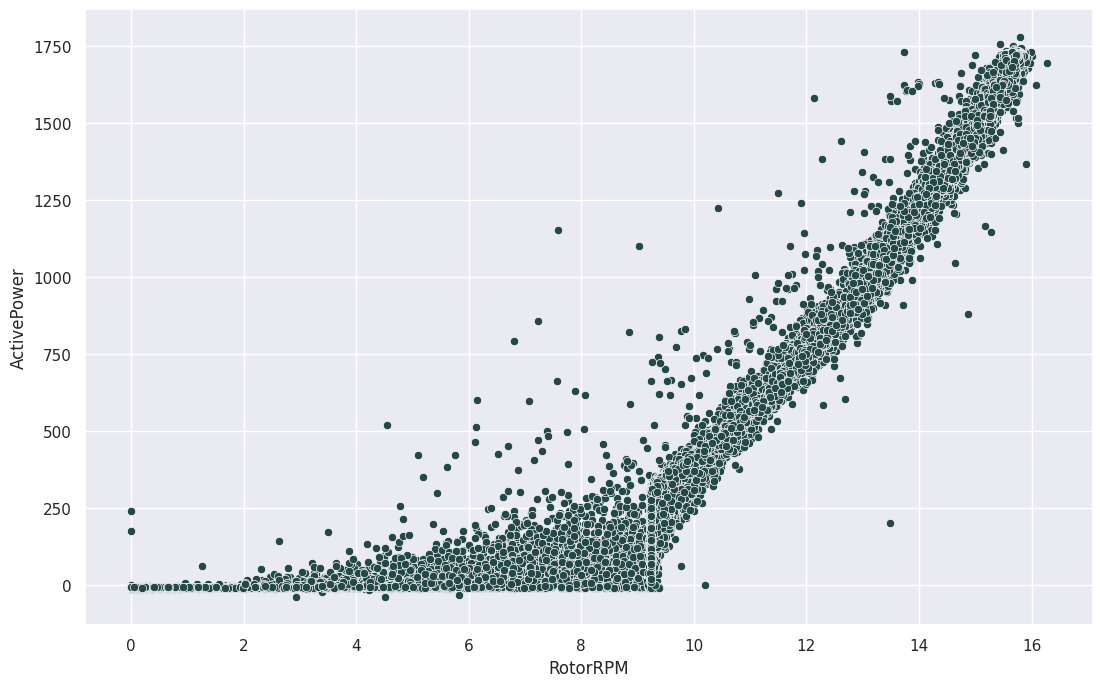

In [18]:
#Scatterplot of RotorRpm and Active Power.
sns.scatterplot( x = df['RotorRPM'], y =df['ActivePower'], color='#244747' )

#### There is an exponential increase in rotor rpm from 10 upwards.

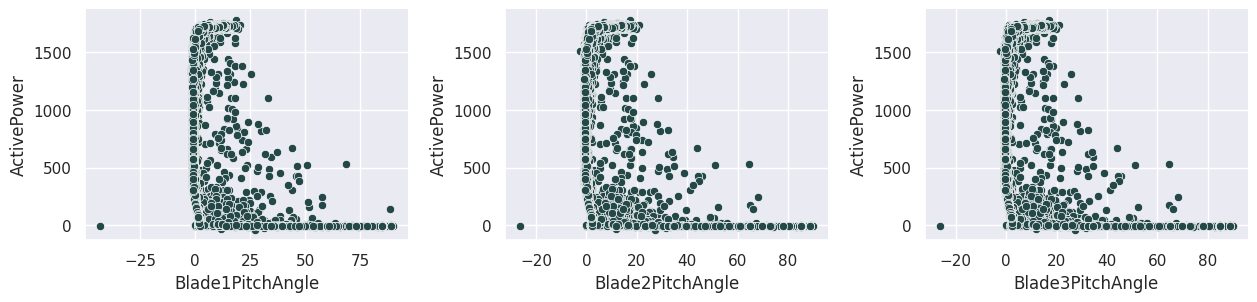

In [19]:
#how does the blade pitch angle affect the output from the data
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3))


ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.scatterplot(x= df["Blade1PitchAngle"], y =df["ActivePower"],color='#244747')

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.scatterplot(x= df["Blade2PitchAngle"], y =df["ActivePower"],color='#244747')

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.scatterplot(x= df["Blade3PitchAngle"], y =df["ActivePower"],color='#244747')

sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots


#### In principle, it does make sense that the power output reduces as the bladepitch angle increases as the pitch angle is used to regulate power output and sometimes shut down the turbine

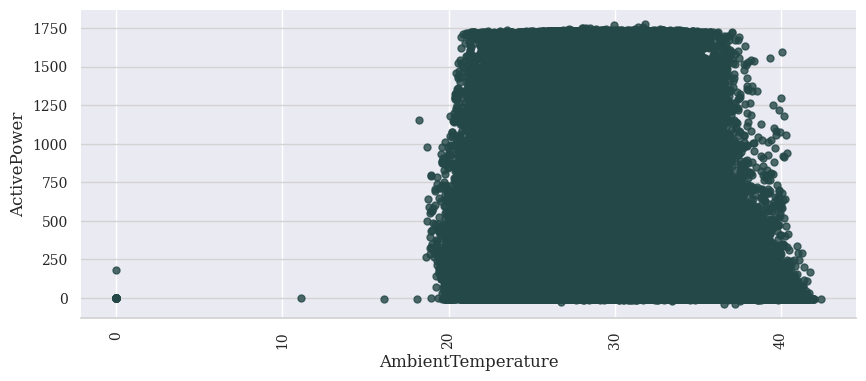

In [20]:
#scatterplot of ambient temperature and Active Power.
fig, ax = plt.subplots(figsize=(10,4))



# Ax spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.spines['bottom'].set_color('lightgray')

# Grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgray', linestyle='-')

# Plot

plt.scatter(x =df['AmbientTemperatue'] , y = df['ActivePower'] ,color='#244747',s = 25 , alpha = 0.8 )


# Tick control
plt.yticks(fontsize=10, fontfamily='serif',fontweight='light')
#ax.yaxis.set_ticks(np.arange(0,140,10))

plt.xticks(fontsize=10, fontfamily='serif',fontweight='light',rotation=90)


# Label control
ax.set_ylabel('ActivePower',fontfamily='serif',fontsize=12)
ax.set_xlabel('AmbientTemperature',fontfamily='serif',fontsize=12)


plt.show()

In [21]:
#Creating a function to put thhe windspeeds into categories
def speed_labels(bins, units):
    labels = []
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('calm'.format(right))
        elif np.isinf(right):
            labels.append('>{} {}'.format(left, units))
        else:
            labels.append('{} - {} {}'.format(left, right, units))

    return list(labels)

In [23]:
#Converting the wind directions to radians
def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * np.pi/180. - np.pi/N
    barWidth = 2 * np.pi / N
    return barDir, barWidth

In [24]:
spd_bins = [-1, 0, 5, 10, 15, 20, 25, 30, np.inf]
spd_labels = speed_labels(spd_bins, units='m/s')

dir_bins = np.arange(-7.5, 370, 15)
dir_labels = (dir_bins[:-1] + dir_bins[1:]) / 2

In [25]:
#A count of how many wind speeds are 0
total_count = df.shape[0]
calm_count = df.query("WindSpeed == 0").shape[0]

print('Of {} total observations, {} have calm winds.'.format(total_count, calm_count))

Of 118224 total observations, 13 have calm winds.


In [26]:
rose = (
    df.assign(WindSpd_bins=lambda df:
            pd.cut(df['WindSpeed'], bins=spd_bins, labels=spd_labels, right=True)
         )
        .assign(WindDir_bins=lambda df:
            pd.cut(df['WindDirection'], bins=dir_bins, labels=dir_labels, right=False)
         )
        .replace({'WindDir_bins': {360: 0}})
        .groupby(by=['WindSpd_bins', 'WindDir_bins'])
        .size()
        .unstack(level='WindSpd_bins')
        .fillna(0)
        .assign(calm=lambda df: calm_count / df.shape[0])
        .sort_index(axis=1)
        .applymap(lambda x: x / total_count * 100)
)

<ipython-input-26-400b732fb9f0>:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace({'WindDir_bins': {360: 0}})
<ipython-input-26-400b732fb9f0>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(by=['WindSpd_bins', 'WindDir_bins'])
<ipython-input-26-400b732fb9f0>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: x / total_count * 100)


In [27]:
#A function that outputs a wind rose plot.
def wind_rose(rosedata, wind_dirs, palette=None):
    if palette is None:
        palette = sns.color_palette('mako', n_colors=rosedata.shape[1])

    bar_dir, bar_width = _convert_dir(wind_dirs)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')

    for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
        if n == 0:
            # first column only
            ax.bar(bar_dir, rosedata[c1].values,
                   width=bar_width,
                   color=palette[0],
                   edgecolor='none',
                   label=c1,
                   linewidth=0)

        # all other columns
        ax.bar(bar_dir, rosedata[c2].values,
               width=bar_width,
               bottom=rosedata.cumsum(axis=1)[c1].values,
               color=palette[n+1],
               edgecolor='none',
               label=c2,
               linewidth=0)

    leg = ax.legend(loc=(0.75, 0.95), ncol=2)
    xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    return fig

<ipython-input-27-ee0cf6865f3d>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])


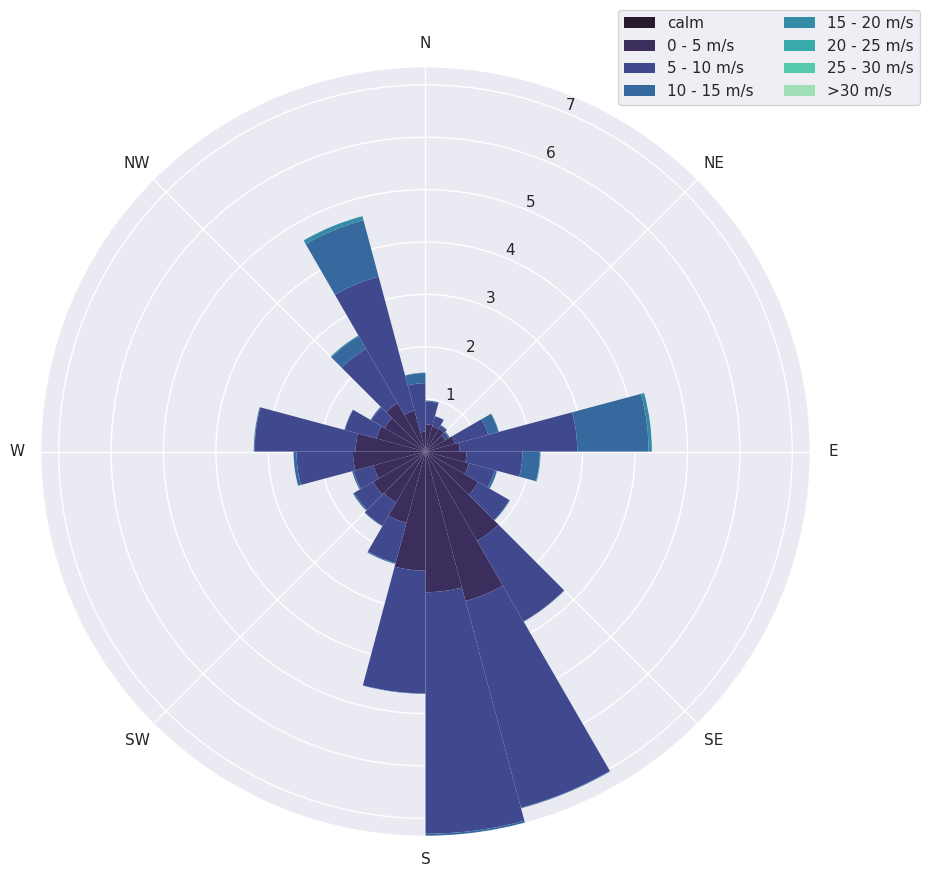

In [28]:
#Plotting the wind rose
directions = np.arange(0, 360, 15)
fig = wind_rose(rose, directions)

### It can be seen that the strongest winds come from the midpoint of the North west (NW) directions.

# checking correlation

In [31]:
df.select_dtypes(include=['number']).corr()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
ActivePower,1.000000,-0.065637,0.655400,-0.368997,-0.367978,-0.367978,NaN,0.818850,0.821921,0.849604,0.931390,0.932521,0.347363,0.101627,0.028108,0.719092,0.849069,-0.000135,0.028108,0.940390
AmbientTemperatue,-0.065637,1.000000,0.246505,0.085461,0.090904,0.090904,NaN,0.017216,0.162511,-0.130123,0.077859,0.078736,0.589729,0.836539,-0.037498,-0.020313,-0.129290,-0.005511,-0.037498,-0.095308
BearingShaftTemperature,0.655400,0.246505,1.000000,-0.475557,-0.466856,-0.466856,NaN,0.883344,0.772887,0.640947,0.765115,0.763926,0.809116,0.542104,0.183929,0.594546,0.640584,-0.000990,0.183929,0.596201
Blade1PitchAngle,-0.368997,0.085461,-0.475557,1.000000,0.997774,0.997774,NaN,-0.599178,-0.557949,-0.757056,-0.376102,-0.372369,-0.198583,0.194911,-0.058300,-0.381478,-0.757147,-0.000534,-0.058300,-0.403092
Blade2PitchAngle,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,NaN,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.000636,-0.057624,-0.402786
Blade3PitchAngle,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,NaN,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.000636,-0.057624,-0.402786
ControlBoxTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GearboxBearingTemperature,0.818850,0.017216,0.883344,-0.599178,-0.592103,-0.592103,NaN,1.000000,0.906020,0.850209,0.853024,0.851923,0.596065,0.307694,0.214486,0.751875,0.850795,-0.002314,0.214486,0.800433
GearboxOilTemperature,0.821921,0.162511,0.772887,-0.557949,-0.549792,-0.549792,NaN,0.906020,1.000000,0.806972,0.899693,0.898335,0.506648,0.190350,0.277619,0.770088,0.807776,-0.004536,0.277619,0.793140
GeneratorRPM,0.849604,-0.130123,0.640947,-0.757056,-0.754325,-0.754325,NaN,0.850209,0.806972,1.000000,0.796434,0.795223,0.303804,-0.052185,0.176964,0.768065,0.999723,0.001133,0.176964,0.854787


#### variables such as Mainboxtemperature, controlboxtemperature, wtg, Nacelle position, Turbine Status, WindDirection do not contribute significantly to the ActivePower output. Whereas, the pitch angle has a negative correlation with the active power.

In [32]:
##Dropping the less useful columns
df.drop(['MainBoxTemperature','TurbineStatus','ControlBoxTemperature','NacellePosition','WindDirection','WTG'], axis = 1, inplace = True)

In [33]:
df

,Datetime,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,ReactivePower,RotorRPM,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,13.775785,9.234004,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,8.088928,9.229370,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,4.355978,9.236802,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,12.018077,9.237374,3.284468


### Data Transformation

In [34]:
targets = df['ActivePower']
inputs = df.drop(['ActivePower','Datetime'],axis = 1)

In [60]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,targets, test_size = 0.2, random_state = 365)

In [61]:
#Transforming the data and feeding it into the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values in X and Y
x_imputer = SimpleImputer(strategy='mean')  # Fill missing X values with mean
y_imputer = SimpleImputer(strategy='mean')  # Fill missing Y values with mean

# Transform the data
x_train = x_imputer.fit_transform(x_train)

y_train_array = y_train.to_numpy().reshape(-1, 1)
y_train = y_imputer.fit_transform(y_train_array).ravel()  # Flatten back

pipe = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                ('scaler',StandardScaler()),
                ('LR', LinearRegression())])
pipe.fit(x_train,y_train)


x_test_imputed = x_imputer.transform(x_test)
y_test_imputed = y_imputer.transform(y_test.to_numpy().reshape(-1, 1)).ravel()


pipe.score(x_test_imputed,y_test_imputed)


0.8980655371165072

In [62]:
#Accuracy of the Linear Regression on the test set
LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test_imputed,y_test_imputed)

0.8980655371165072

Text(0, 0.5, 'True Values')

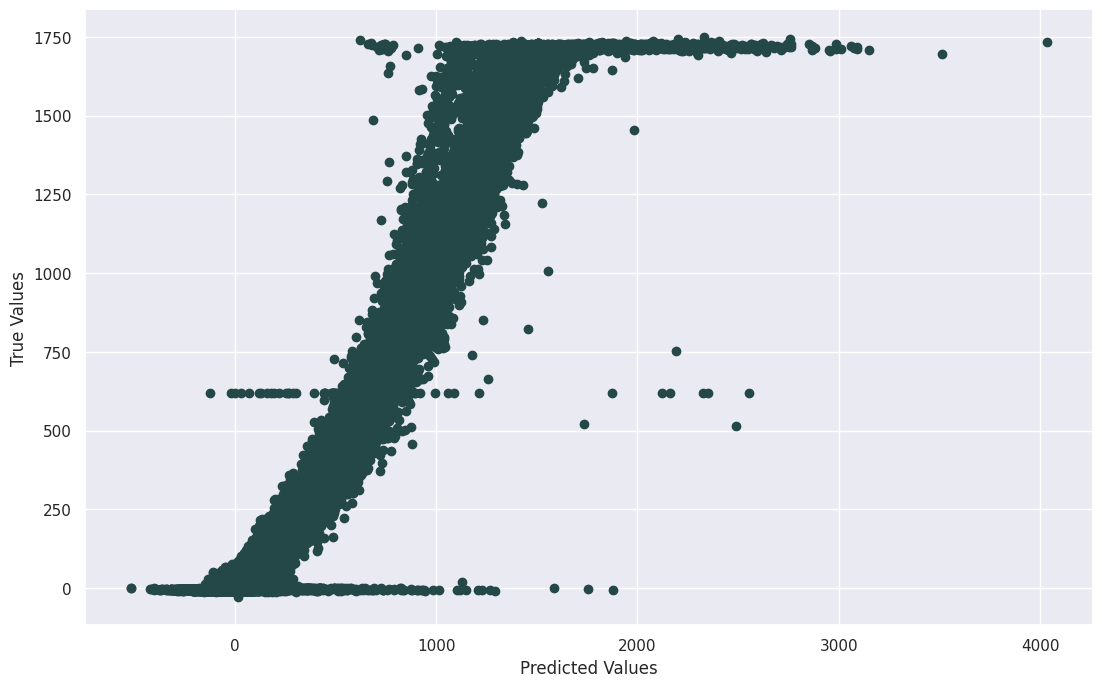

In [63]:
#A scatter plot of the predicted values against the true values.
y_pred1 = LR.predict(x_test_imputed)
plt.scatter(y_pred1,y_test_imputed, color = '#244747')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

### Using K-fold cross validation

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state= 365)
cross_val_score(LinearRegression(), inputs,targets,cv=cv)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 601, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


## Finding the best model using GridSearchCV

In [51]:
algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params': {
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
    'Random Forest':{
        'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[1,10],
                'criterion':['mse','mae']
            }
        }


    }


In [52]:
scores = []
best_estimators = {}
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
for algo_name, config in algos.items():
        pipe = make_pipeline(StandardScaler(), config['model'])
        gs = GridSearchCV(config['model'], config['params'], cv=cv,return_train_score = True)
        gs.fit(inputs,targets)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        best_estimators[algo_name] = gs.best_estimator_
df1 = pd.DataFrame(scores, columns = ['model','best_score','best_params'])
df1

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [65]:
#Fitting of random forest regressor
reg = RandomForestRegressor(n_estimators = 10)
reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [66]:
#Accuracy of the random forest regressor on the train set
reg.score(x_train,y_train)

0.9991502994374329

In [68]:
#Accuracy of the random forest regressor on the test set
reg.score(x_test_imputed,y_test_imputed)

0.9948248382574291

Text(0, 0.5, 'True Values')

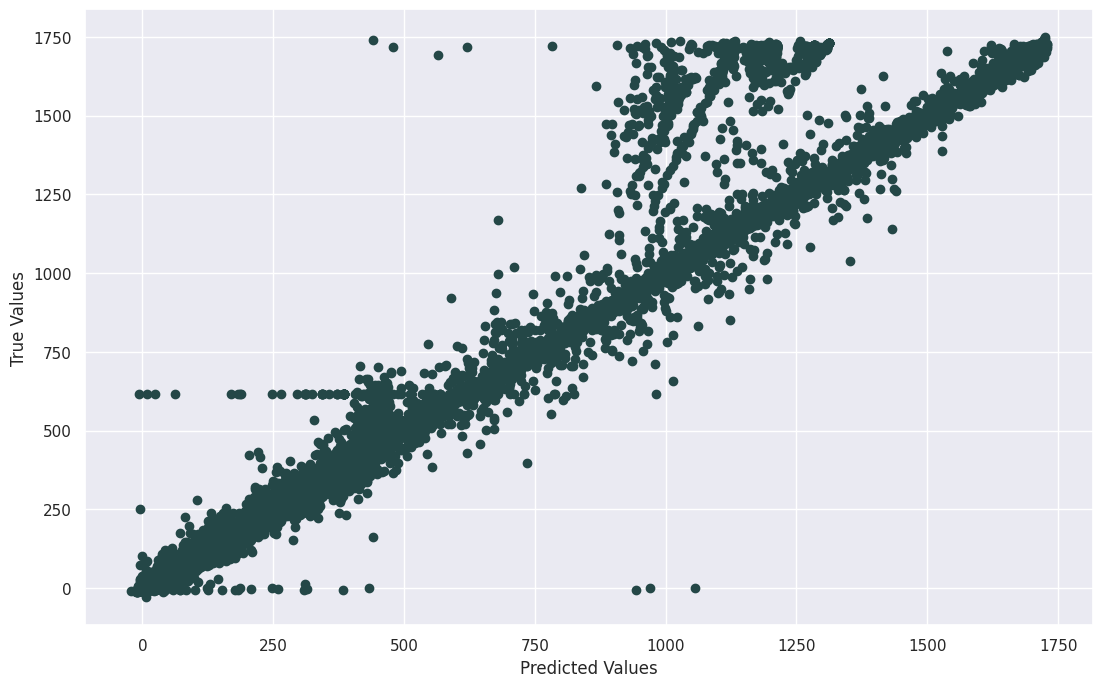

In [57]:
#A scatter plot of the predicted values against the true values.
y_pred = reg.predict(x_test_imputed)
plt.scatter(y_pred,y_test_imputed, color = '#244747')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

<ipython-input-58-6a50f562ad32>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred,color = '#244747')


<Axes: xlabel='ActivePower', ylabel='Density'>

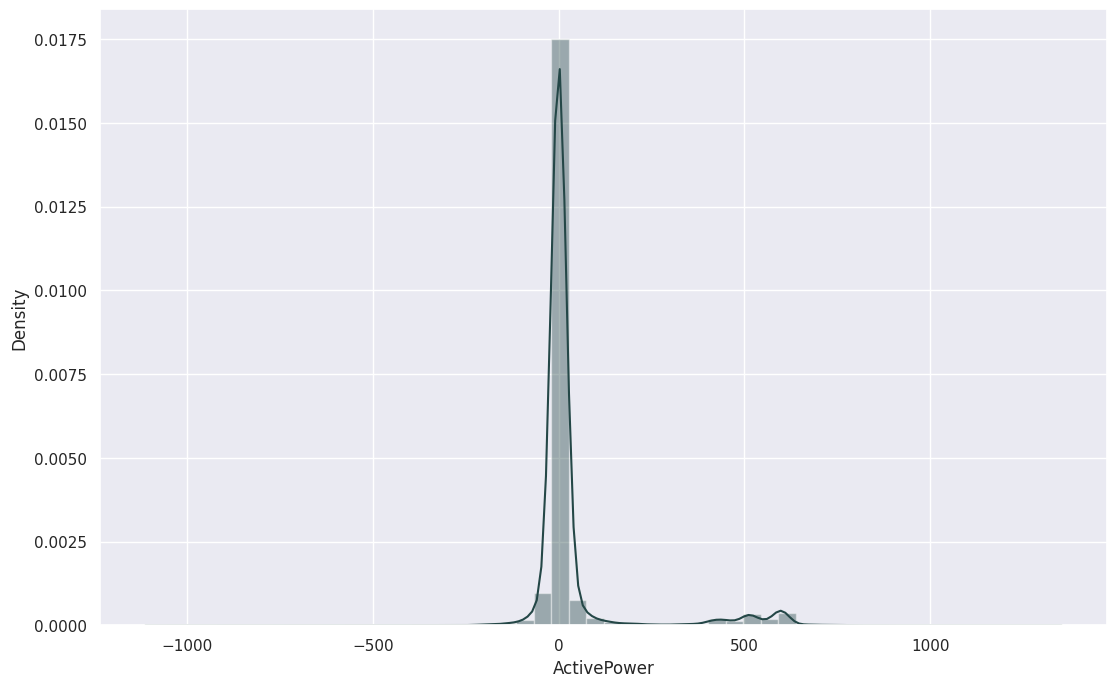

In [58]:
#A distribution of the residual
sns.distplot(y_test-y_pred,color = '#244747')

Feature: 0, Score: 0.00112
Feature: 1, Score: 0.00019
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00046
Feature: 4, Score: 0.00032
Feature: 5, Score: 0.00030
Feature: 6, Score: 0.00037
Feature: 7, Score: 0.01299
Feature: 8, Score: 0.00029
Feature: 9, Score: 0.00028
Feature: 10, Score: 0.00021
Feature: 11, Score: 0.01672
Feature: 12, Score: 0.00934
Feature: 13, Score: 0.95722


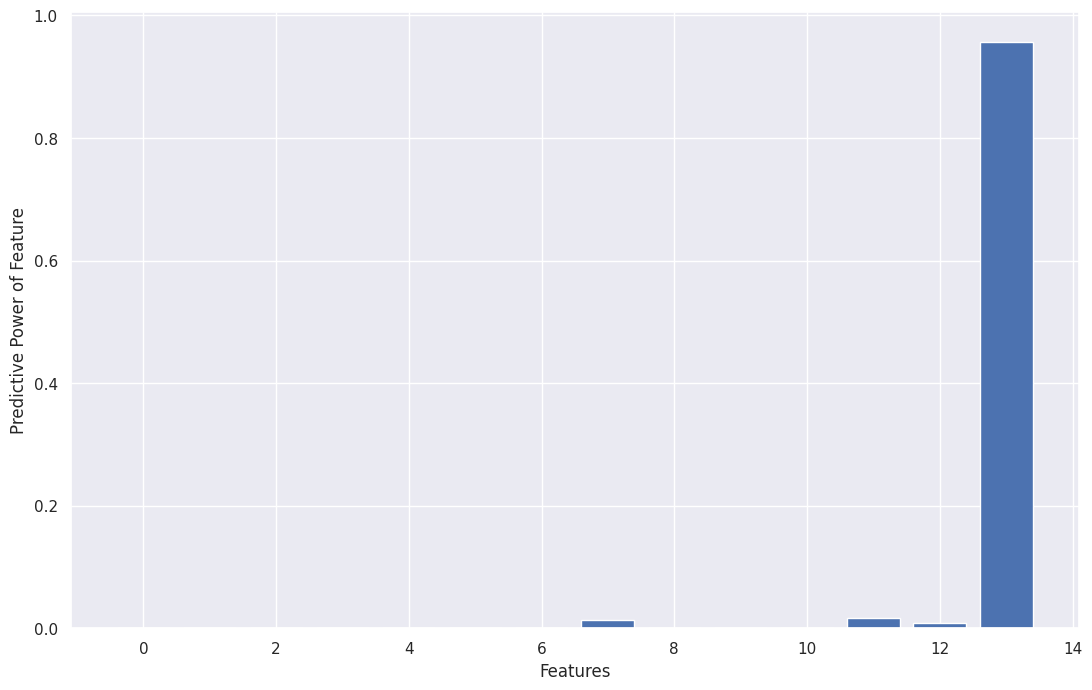

In [59]:
#Which features has the most predictive power.
importance = reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Predictive Power of Feature')
plt.show()